# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

In [2]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
athletes = pd.read_csv("athletes.csv")

In [4]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.

#Amostra de tamanho 3000 da coluna height e weight
sample_height_3000 = get_sample(athletes, 'height', n = 3000)
sample_weight_3000 = get_sample(athletes, 'weight', n = 3000)

In [6]:
#Transformação logarítmica na amostra de weight da questão 3
log = np.log(sample_weight_3000)

In [7]:
#Todos os atletas brasileiros, norte-americanos e canadenses em DataFrames chamados bra, usa e can,respectivamente
bra = athletes[athletes['nationality'] == 'BRA'].dropna(subset=['height'])
usa = athletes[athletes['nationality'] == 'USA'].dropna(subset=['height'])
can = athletes[athletes['nationality'] == 'CAN'].dropna(subset=['height'])

### Análise Questão 1

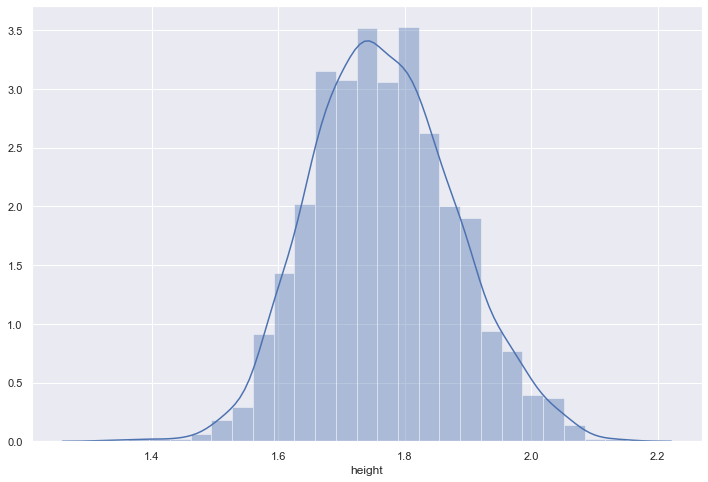

In [8]:
#Histograma da Variável
sns.distplot(sample_height_3000, bins = 25);

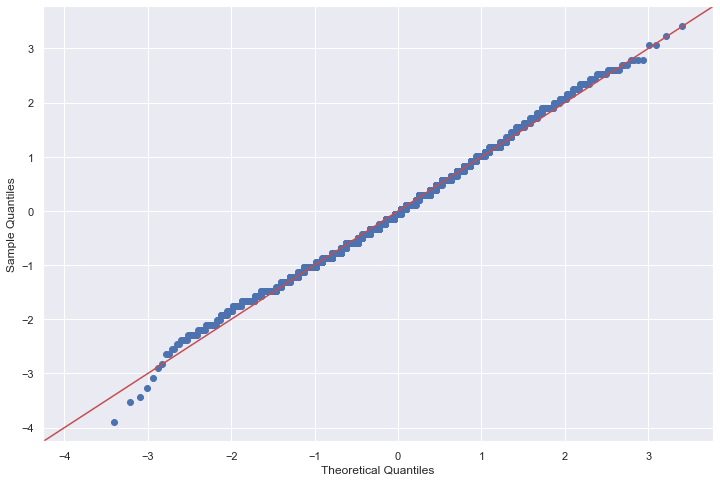

In [9]:
#qq-plot da Variável
import statsmodels.api as sm

sm.qqplot(sample_height_3000, fit = True, line = "45");

### Análise Questão 3

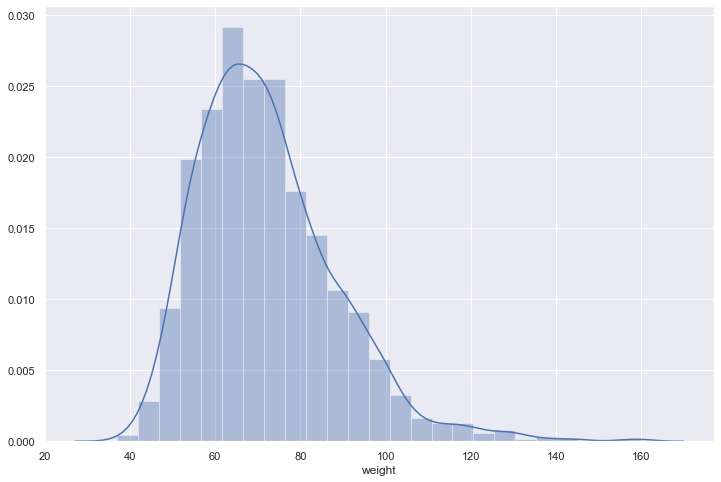

In [10]:
#Histograma da Variável
sns.distplot(sample_weight_3000, bins = 25);

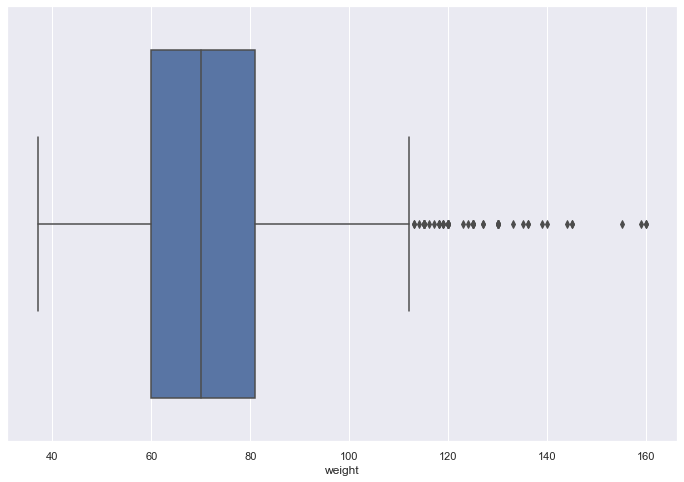

In [11]:
#Boxplot da Variável
sns.boxplot(sample_weight_3000);

### Análise Questão 4

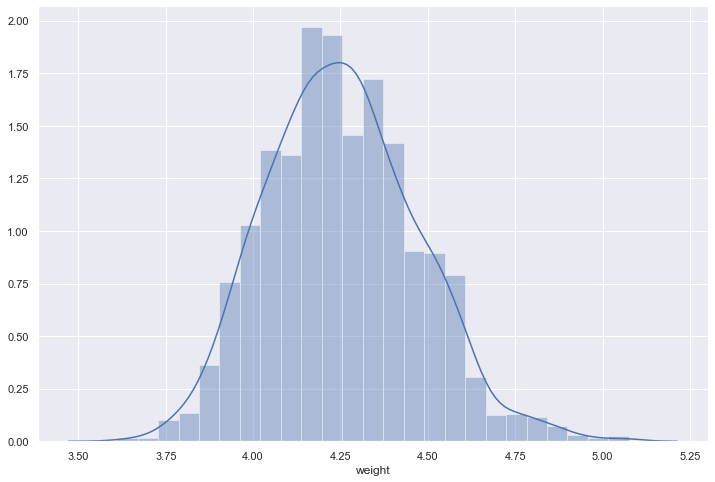

In [12]:
#Histograma da Variável
sns.distplot(log, bins = 25);

### Análise Questão 7

In [13]:
#Média
usa['height'].mean(), can['height'].mean()

(1.7877678571428557, 1.7585937500000004)

In [14]:
# n
usa['height'].count(), can['height'].count()

(560, 320)

* Hipótese nula (H0) - os dados seguem uma distribuição normal (p-value > alpha)
* Hipótese alternativa (H1) - os dados não seguem uma distribuição normal (p-value <= alpha)

* Erro Tipo I = rejeitar 𝐻0|𝐻0 verdadeira
* Erro Tipo II = não rejeitar 𝐻0|𝐻0 falsa

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [15]:
def q1():
    #Amostra de tamanho 3000 da coluna height
        #sample_height_3000 = get_sample(athletes, 'height', n = 3000)
    
    #Teste de normalidade de Shapiro-Wilk
    stat, p = sct.shapiro(sample_height_3000)
    
    #Resultado
    alpha = 0.05
    return p > alpha

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?

     * Resposta: Não são condizentes. O gráfico apresenta a forma de uma distribuição normal, porém, segundo o teste de normalidade de Shapiro-Wilk realizado, o p-value é menor que o nível de significância de 5%, o que indica que a hipótese nula (H0) deve ser rejeitada.


* Plote o qq-plot para essa variável e a analise.

     * Resposta: Percebe-se que há vários pontos alinhados em cima da reta, nos mostrando que a distribuição da amostra se aproxima da distribuição teórica. Nota-se também outliers que contribuem para que a hipótese nula seja rejeitada.


* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

     * Resposta: Não, pois os níveis de significância típicos são 0.025, 0.05 e 0.10 e o p-value calculado (5.681722541339695e-07) é menor do que os três. Além disso, diminuir o nível de significância causaria o aumento do poder do teste, ou seja, o aumento da probabilidade de se cometer um Erro Tipo II.

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [16]:
def q2():
    #Teste de normalidade de Jarque-Bera
    stat, p = sct.jarque_bera(sample_height_3000)
    
    #Resultado
    alpha = 0.05
    return bool(p > alpha)

__Para refletir__:

* Esse resultado faz sentido?

    * Resposta: Sim, solidifica a hipótese de se rejeitar H0 já que o p-value calculado (0.001478366424594868) é menor que o nível de significância de 5%.

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [17]:
def q3():
    #Amostra de tamanho 3000 da coluna height
        #sample_weight_3000 = get_sample(athletes, 'weight', n = 3000)
    
    #Teste de normalidade de D'Agostino-Pearson
    stat, p = sct.normaltest(sample_weight_3000)
    
    #Resultado
    alpha = 0.05
    return bool(p > alpha)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?

    * Resposta: São condizentes. O gráfico apresenta uma assimetria positiva da distribuição de dados, mostrando assim que os dados não segue uma distribuição normal. Isso é reforçado pelo resultado do teste onde o p-value (1.5898922918029537e-111) é menor que o nível de significância de 5%.


* Um _box plot_ também poderia ajudar a entender a resposta.

    * Resposta: o box plot facilita ver os outliers que contribuem para a rejeição da hipótese nula (H0).

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [18]:
def q4():
    #Transformação logarítmica na amostra de weight da questão 3
        #log = np.log(sample_weight_3000)
    
    #Teste de normalidade de D'Agostino-Pearson
    stat, p = sct.normaltest(log)
    
    #Resultado
    alpha = 0.05
    return bool(p > alpha)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?

    * Resposta: São condizentes. A transformação logarítmica da variável fez com que os dados não apresentassem mais uma assimetria positiva, mas ainda há muitos outliers que contribuem para a rejeição da hipótese nula (H0). O que vai de encontro com o resultado do teste de normalidade de D'Agostino-Pearson em que o p-value (1.0705572101256944e-10) é menor que o nível de significância de 5%.
    

* Você esperava um resultado diferente agora?

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

* Hipótese nula (H0) - as amostras são provavelmente retiradas das mesmas distribuições (p-value > alpha)
* Hipótese alternativa (H1) - as amostras são provavelmente retiradas de diferentes distribuições (p-value <= alpha)

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [19]:
def q5():
    #Todos os atletas brasileiros, norte-americanos e canadenses em DataFrames chamados bra, usa e can,respectivamente
        #bra = athletes[athletes['nationality'] == 'BRA'].dropna(subset=['height'])
        #usa = athletes[athletes['nationality'] == 'USA'].dropna(subset=['height'])
        #can = athletes[athletes['nationality'] == 'CAN'].dropna(subset=['height'])
    
    #Teste de hipóteses para comparação das médias das alturas (height) para amostras independentes e variâncias diferentes com a função scipy.stats.ttest_ind() entre bra e usa
    stat, p = sct.ttest_ind(bra['height'], usa['height'], equal_var = False)
    
    #Resultado
    alpha = 0.05
    return bool(p > alpha)

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [20]:
def q6():
    #Teste de hipóteses para comparação das médias das alturas (height) para amostras independentes e variâncias diferentes com a função scipy.stats.ttest_ind() entre bra e can
    stat, p = sct.ttest_ind(bra['height'], can['height'], equal_var = False)
    
    #Resultado
    alpha = 0.05
    return bool(p > alpha)

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [21]:
def q7():
    #Teste de hipóteses para comparação das médias das alturas (height) para amostras independentes e variâncias diferentes com a função scipy.stats.ttest_ind() entre usa e can
    stat, p = sct.ttest_ind(usa['height'], can['height'], equal_var = False)
    
    #Resultado
    return float(round(p,8))

__Para refletir__:

* O resultado faz sentido?

    * Resposta: sim, as médias não são próximas (1.7877 e 1.7585) e o p-value calculado (0.00046601) indica a rejeição da hipótese nula (H0).
    

* Você consegue interpretar esse p-valor?

    * Resposta: o p-value calculado é menor que o nível de significância de 5%. Ou seja, para 95 amostras semelhantes em 100, as médias seriam significativamente diferentes.
    

* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?

    * Resposta: sim, procurando a variável estatística calculada acima (3.516987632488539) na tabela de distribuições t-Student, o p-value encontrado é menor que 0.0005.